Price Prediction

In [ ]:
! pip install pandas

In [ ]:
! pip install matplotlib

In [ ]:
! pip install seaborn

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_csv('final_car_data.csv')
data.head()

,Kms_Driven,Owner_No,Price,Engine_Displacement(cc),Mileage(kmpl),Max_Power(bhp),Seats,Car_Age,Fuel_Type_Cng,Fuel_Type_Diesel,...,Model_Volvo S 80,Model_Volvo S60,Model_Volvo S60 Cross Country,Model_Volvo S90,Model_Volvo V40,Model_Volvo XC 90,Model_Volvo XC40,Model_Volvo XC60,Transmission_Type_Automatic,Transmission_Type_Manual
0,120000,3,400000.0,998,23.10,67.04,5,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32706,2,811000.0,1497,17.00,121.31,5,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11949,1,585000.0,1199,23.84,84.00,5,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17794,1,462000.0,1197,19.10,81.86,5,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60000,1,790000.0,1248,23.65,88.50,5,10,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
(data.isnull().sum()/len(data))*100

Kms_Driven                     0.0
Owner_No                       0.0
Price                          0.0
Engine_Displacement(cc)        0.0
Mileage(kmpl)                  0.0
                              ... 
Model_Volvo XC 90              0.0
Model_Volvo XC40               0.0
Model_Volvo XC60               0.0
Transmission_Type_Automatic    0.0
Transmission_Type_Manual       0.0
Length: 338, dtype: float64

In [135]:
df=data.copy()

Skewness in Data

In [136]:
df.skew()

Kms_Driven                     51.892884
Owner_No                        1.858002
Price                           6.708391
Engine_Displacement(cc)         1.751279
Mileage(kmpl)                   3.971474
                                 ...    
Model_Volvo XC 90              39.663581
Model_Volvo XC40               39.663581
Model_Volvo XC60               26.710576
Transmission_Type_Automatic     1.048751
Transmission_Type_Manual       -1.048751
Length: 338, dtype: float64

#Positive value means the distribution is skewed to the right.
#Negative value means the distribution is skewed to the left.
#0 means perfect normal distribution. The bell shaped curve.
#Here the columns kms_driven, mileage, max power and Engine displacement ,Price,Ower_No are right skewed.

In [137]:
# List of columns to plot
columns = ["Kms_Driven", "Engine_Displacement(cc)", "Mileage(kmpl)", "Max_Power(bhp)"]

cbrt transformation

In [138]:
for col in columns:
    df[col]  = np.cbrt(df[col])

In [139]:
for col in columns:
    print(col,"-------", df[col].skew())

Kms_Driven ------- 0.37742164180292104
Engine_Displacement(cc) ------- 1.0087054669261875
Mileage(kmpl) ------- 0.023430801926596887
Max_Power(bhp) ------- 1.0628802135711266


Plotting the distribution plots before and After Transform

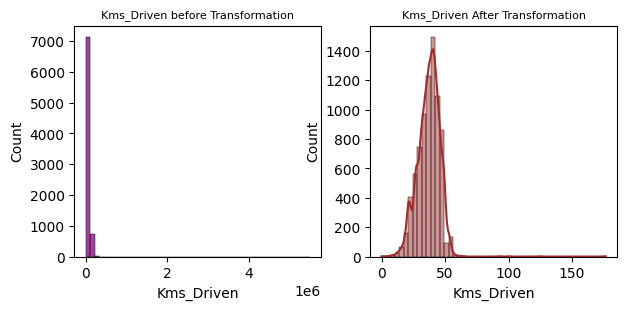

The skewness after transformation is : 0.37742164180292104


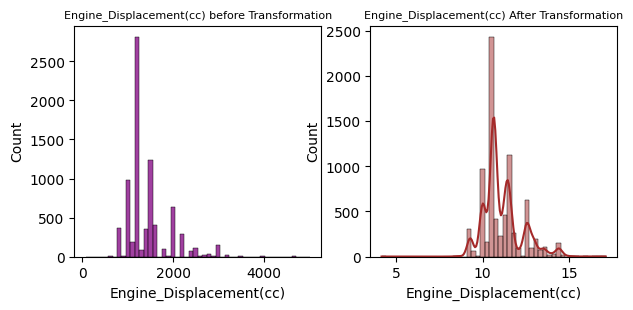

The skewness after transformation is : 1.0087054669261875


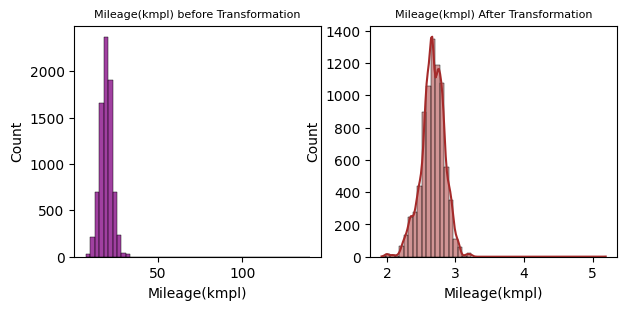

The skewness after transformation is : 0.023430801926596887


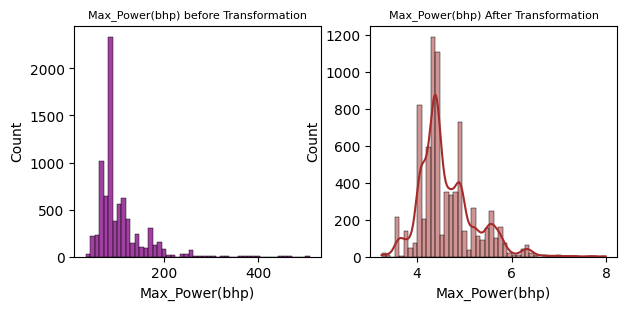

The skewness after transformation is : 1.0628802135711266


In [140]:
def plot(column):   
    
    plt.figure(figsize=(7,3))
    plt.subplot(1,2,1)
    plt.title(f"{column} before Transformation", fontsize=8)
    sns.histplot(data[column],bins=50 , color="purple")
    
    plt.subplot(1,2,2)
    plt.title(f"{column} After Transformation", fontsize=8)
    sns.histplot(df[column],bins=50, kde=True , color='brown')
    plt.xlabel(column)
    plt.show()
    
for col in columns:  
    plot(column= col)
    print('The skewness after transformation is :',df[col].skew())

Treating the Outliers

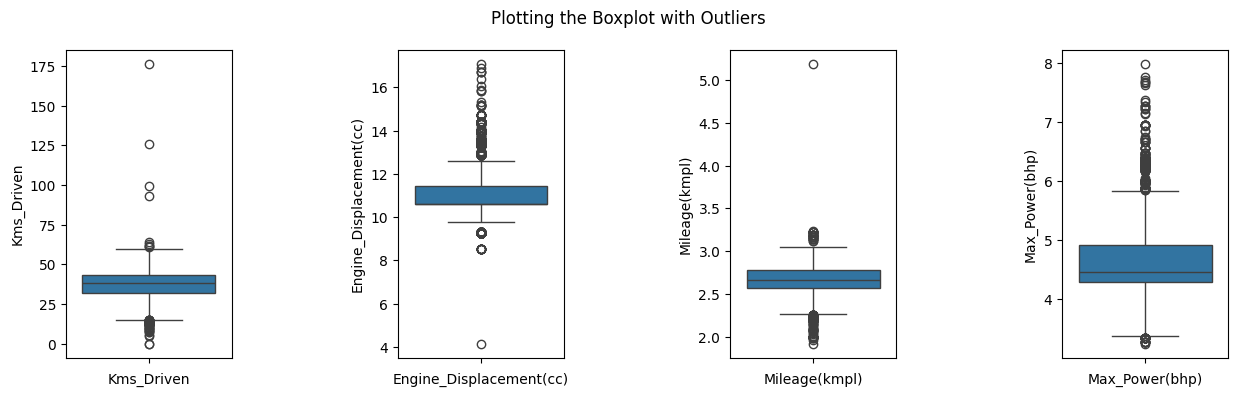

In [141]:
import matplotlib.pyplot as plt
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4,figsize=(15, 4))
fig.suptitle('Plotting the Boxplot with Outliers')
# add padding between the subplots
plt.subplots_adjust(wspace=1) 


# draw boxplot for each column in the each subplot
for i,val in enumerate(columns):
    sns.boxplot(data=df[val], ax=ax[i])
    ax[i].set_xlabel(val)

In [142]:
for column in columns:
    # IQR Detection
    # Calculate the upper and lower limits
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[column] = df[column].clip(lower, upper)

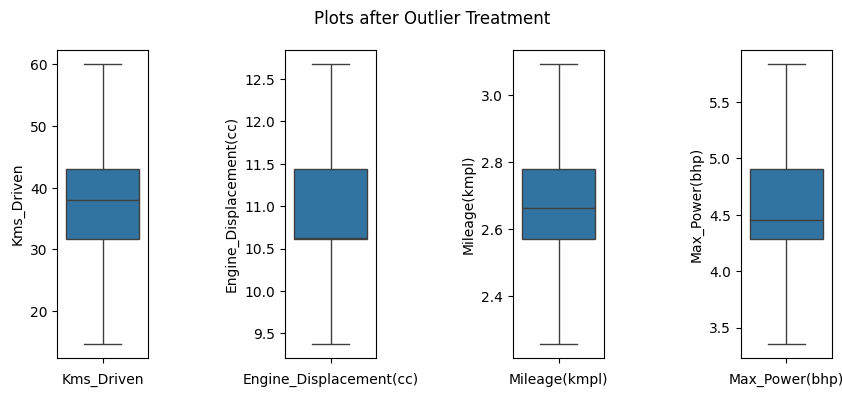

In [143]:
fig, ax = plt.subplots(1,4,figsize=(10,4))
fig.suptitle('Plots after Outlier Treatment')
# add padding between the subplots
plt.subplots_adjust(wspace=1.5) 


# draw boxplot for each column in the each subplot
for i,val in enumerate(columns):
    sns.boxplot(data=df[val], ax=ax[i])
    ax[i].set_xlabel(val)

After outlier treatment : skewness of the numerical data

In [144]:
df[columns].skew()

Kms_Driven                -0.369474
Engine_Displacement(cc)    0.396313
Mileage(kmpl)             -0.255490
Max_Power(bhp)             0.619211
dtype: float64

In [146]:
df.head()

,Kms_Driven,Owner_No,Price,Engine_Displacement(cc),Mileage(kmpl),Max_Power(bhp),Seats,Car_Age,Fuel_Type_Cng,Fuel_Type_Diesel,...,Model_Volvo S 80,Model_Volvo S60,Model_Volvo S60 Cross Country,Model_Volvo S90,Model_Volvo V40,Model_Volvo XC 90,Model_Volvo XC40,Model_Volvo XC60,Transmission_Type_Automatic,Transmission_Type_Manual
0,49.324241,3,400000.0,9.993329,2.847983,4.062356,5,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.979805,2,811000.0,11.439506,2.571282,4.950308,5,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22.861805,1,585000.0,10.623633,2.878075,4.379519,5,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.107054,1,462000.0,10.617723,2.673075,4.342008,5,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,39.148676,1,790000.0,10.766425,2.870409,4.456368,5,10,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
df["Price"].unique()

array([ 400000.,  811000.,  585000., ...,  158000.,   35000., 1082000.],
      shape=(1341,))

Model Training

In [ ]:
x = df.drop('Price',axis=1) #data,dropping target  
y = df['Price'] #target

In [ ]:
! pip install xgboost

In [148]:
from sklearn.model_selection import train_test_split  #train test split (evaluation)
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

1. Extra Trees Regressor

In [150]:
ext =ExtraTreesRegressor()
ext.fit(x_train,y_train)

ExtraTreesRegressor()

In [151]:
ex_train_pred = ext.predict(x_train)
ex_test_pred = ext.predict(x_test)

In [88]:
print("EXTRA TREE REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,ex_train_pred ))
print("MAE :",metrics.mean_absolute_error(y_train,ex_train_pred ))
print("MSE :",metrics.mean_squared_error(y_train,ex_train_pred ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,ex_train_pred )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,ex_test_pred))
print("MAE :",metrics.mean_absolute_error(y_test,ex_test_pred))
print("MSE :",metrics.mean_squared_error(y_test,ex_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,ex_test_pred)))

EXTRA TREE REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9991559384936853
MAE : 0.07963888766934303
MSE : 0.28621893850305447
RMSE : 0.534994335019591
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.9082707229224025
MAE : 3.9308206324024346
MSE : 31.100961215247956
RMSE : 5.576823577561689


2. Decision tree

In [152]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [154]:
dt_train = dt.predict(x_train)
dt_test = dt.predict(x_test)

In [155]:
print("Decision TREE REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,dt_train ))
print("MAE :",metrics.mean_absolute_error(y_train,dt_train ))
print("MSE :",metrics.mean_squared_error(y_train,dt_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,dt_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,dt_test))
print("MAE :",metrics.mean_absolute_error(y_test,dt_test))
print("MSE :",metrics.mean_squared_error(y_test,dt_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,dt_test)))

Decision TREE REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.999706686090697
MAE : 2190.9446736485775
MSE : 336003014.91589975
RMSE : 18330.38501821224
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.6942011611488577
MAE : 224277.18993231814
MSE : 672389848414.4634
RMSE : 819993.8099854556


3. Linear Regression

In [156]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [157]:
lin_train = lr.predict(x_train)
lin_test = lr.predict(x_test)

In [160]:
print("Linear REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,lin_train ))
print("MAE :",metrics.mean_absolute_error(y_train,lin_train ))
print("MSE :",metrics.mean_squared_error(y_train,lin_train))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,lin_train)))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,lin_test))
print("MAE :",metrics.mean_absolute_error(y_test,lin_test))
print("MSE :",metrics.mean_squared_error(y_test,lin_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,lin_test)))

Linear REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.8636273356922095
MAE : 194436.10525148473
MSE : 156220434511.3109
RMSE : 395247.308038032
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.6417144650850114
MAE : 240873.76461909444
MSE : 787797486137.1326
RMSE : 887579.5660880959


4. Random Forest Regressor

In [161]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [162]:
rf_train = rf.predict(x_train)
rf_test = rf.predict(x_test)

In [163]:
print("Random Forest REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,rf_train ))
print("MAE :",metrics.mean_absolute_error(y_train,rf_train ))
print("MSE :",metrics.mean_squared_error(y_train,rf_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,rf_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,rf_test))
print("MAE :",metrics.mean_absolute_error(y_test,rf_test))
print("MSE :",metrics.mean_squared_error(y_test,rf_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,rf_test)))

Random Forest REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9851366723876109
MAE : 50795.626962314804
MSE : 17026546409.995924
RMSE : 130485.80922842117
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.7286397224499266
MAE : 169057.74920957215
MSE : 596666411727.0208
RMSE : 772441.8500618805


5. XGB Regressor

In [164]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [165]:
xg_train = xgb.predict(x_train)
xg_test = xgb.predict(x_test)

In [166]:
print("XgBoost REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,xg_train ))
print("MAE :",metrics.mean_absolute_error(y_train,xg_train ))
print("MSE :",metrics.mean_squared_error(y_train,xg_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,xg_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,xg_test))
print("MAE :",metrics.mean_absolute_error(y_test,xg_test))
print("MSE :",metrics.mean_squared_error(y_test,xg_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,xg_test)))

XgBoost REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9868786222327014
MAE : 83265.35998492542
MSE : 15031072001.116203
RMSE : 122601.27242861799
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.744855290033775
MAE : 162982.98523135114
MSE : 561011655578.7612
RMSE : 749007.1131696689


# Save the Model

In [167]:
import pickle

with open('ext.pkl', 'wb') as file:
    pickle.dump(ext, file)
    
print("Model saved successfully.")    

Model saved successfully.
